In [14]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# import preprocessing from sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Read in data and display first 5 rows
features = pd.read_csv(r'F:\wenqu\environment_factors\zonal_statistics\combine.csv')
features.head(5)

,la_ymax,sla_mean_value,d13c_mean_value,d15n_mean_value,ldmc_mean_value,pc_mean_value,snow_value,slope_value,RAD_value,SWI_value,TWI_value,annual_temp_value,annual_precp_value,summer_precp_value,summer_temp_value
0,1.138349,4.515089,-28.100536,0.870116,-1.235871,3.837310,135.296296,32.042071,2.144406,15.396057,3.179301,-7.237500,293.0,48.5,10.366667
1,0.855036,4.462237,-28.148775,1.521652,-1.314599,3.821872,137.809524,23.670947,1.808392,14.835648,3.981742,-6.950000,291.0,48.0,10.783333
2,1.062939,4.468578,-29.094899,0.063880,-0.699813,3.797745,141.000000,12.429877,1.252402,15.583333,3.278767,-6.991667,290.0,48.0,10.733334
3,-0.109422,4.463972,-29.055893,-0.979734,-0.948795,3.798823,142.000000,14.317726,0.014420,14.333333,3.171807,-7.191667,290.0,48.0,10.466666
4,3.991212,4.778846,-28.741293,-6.886267,0.399368,3.924988,137.960000,6.083298,1.353919,15.910985,5.094476,-7.525000,296.5,49.0,10.000000


In [3]:
# Identifying columns that contain NaN values
columns_with_nan = features.columns[features.isnull().any()].tolist()

# Printing columns with NaN values
print("Columns containing NaN values:", columns_with_nan)

Columns containing NaN values: ['slope_value', 'RAD_value']


In [4]:
# Identifying rows that contain NaN values in any column
rows_with_nan = features[features.isnull().any(axis=1)]

# Printing rows with NaN values
print("Rows containing NaN values:")
print(rows_with_nan)

Rows containing NaN values:
       la_ymax  sla_mean_value  d13c_mean_value  d15n_mean_value  \
4657  1.246960        4.480948       -27.788002         2.188134   
5410  1.744868        4.659742       -27.644189        -0.026333   

      ldmc_mean_value  pc_mean_value  snow_value  slope_value  RAD_value  \
4657         -1.90551       3.729843       137.0          NaN        NaN   
5410         -0.94123       3.834332       137.0          NaN        NaN   

      SWI_value  TWI_value  annual_temp_value  annual_precp_value  \
4657      10.25 -13.815511             -5.300               320.0   
5410      10.50 -13.815511             -5.325               327.0   

      summer_precp_value  summer_temp_value  
4657                50.0          12.833333  
5410                52.0          12.900001  


In [5]:

features = features.dropna()
features

,la_ymax,sla_mean_value,d13c_mean_value,d15n_mean_value,ldmc_mean_value,pc_mean_value,snow_value,slope_value,RAD_value,SWI_value,TWI_value,annual_temp_value,annual_precp_value,summer_precp_value,summer_temp_value
0,1.138349,4.515089,-28.100536,0.870116,-1.235871,3.837310,135.296296,32.042071,2.144406,15.396057,3.179301,-7.237500,293.0,48.5,10.366667
1,0.855036,4.462237,-28.148775,1.521652,-1.314599,3.821872,137.809524,23.670947,1.808392,14.835648,3.981742,-6.950000,291.0,48.0,10.783333
2,1.062939,4.468578,-29.094899,0.063880,-0.699813,3.797745,141.000000,12.429877,1.252402,15.583333,3.278767,-6.991667,290.0,48.0,10.733334
3,-0.109422,4.463972,-29.055893,-0.979734,-0.948795,3.798823,142.000000,14.317726,0.014420,14.333333,3.171807,-7.191667,290.0,48.0,10.466666
4,3.991212,4.778846,-28.741293,-6.886267,0.399368,3.924988,137.960000,6.083298,1.353919,15.910985,5.094476,-7.525000,296.5,49.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17752,2.036691,4.592824,-29.161771,-5.242683,0.584584,3.859010,153.012048,0.677610,0.967326,14.602763,2.075386,-10.595833,170.0,25.0,7.816667
17753,2.347136,4.623554,-29.607767,-5.776081,0.581496,3.817725,150.836735,0.594112,0.960732,14.820056,1.650930,-10.505208,168.0,25.0,7.933334
17754,2.450821,4.592195,-28.078510,-3.484088,-0.059975,3.815637,150.433333,0.865812,0.971890,15.606838,2.322327,-10.475000,168.0,25.0,7.950000
17755,2.059386,4.585142,-29.249625,-5.374062,0.657085,3.858269,153.105263,0.628140,0.961394,14.640766,1.741513,-10.599999,170.0,25.0,7.800000


In [7]:
la_ymax_labels = features['la_ymax']

d13c_ymax_labels = features['d13c_mean_value']
d15n_ymax_labels = features['d15n_mean_value']

sla_ymax_labels = features['sla_mean_value']
ldmc_ymax_labels = features['ldmc_mean_value']
pc_ymax_labels = features['pc_mean_value']

In [8]:

# Labels are the values we want to predict
# labels = np.array(features['ldmc_ymax'])
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop(['la_ymax', 'sla_mean_value', 'd13c_mean_value', 'd15n_mean_value', 'ldmc_mean_value', 'pc_mean_value'], axis=1)

# Saving feature names for later use
feature_list = list(features.columns)
# # Convert to numpy array
# features = np.array(features)

In [9]:
feature_list

['snow_value',
 'slope_value',
 'RAD_value',
 'SWI_value',
 'TWI_value',
 'annual_temp_value',
 'annual_precp_value',
 'summer_precp_value',
 'summer_temp_value']

In [10]:
X_train_la_ymax, X_test_la_ymax, y_train_la_ymax, y_test_la_ymax = train_test_split(features, la_ymax_labels, test_size = 0.3, random_state = 42)


X_train_d13c_ymax, X_test_d13c_ymax, y_train_d13c_ymax, y_test_d13c_ymax = train_test_split(features, d13c_ymax_labels, test_size = 0.3, random_state = 42)
X_train_d15n_ymax, X_test_d15n_ymax, y_train_d15n_ymax, y_test_d15n_ymax = train_test_split(features, d15n_ymax_labels, test_size = 0.3, random_state = 42)
X_train_sla_ymax, X_test_sla_ymax, y_train_sla_ymax, y_test_sla_ymax = train_test_split(features, sla_ymax_labels, test_size = 0.3, random_state = 42)
X_train_ldmc_ymax, X_test_ldmc_ymax, y_train_ldmc_ymax, y_test_ldmc_ymax = train_test_split(features, ldmc_ymax_labels, test_size = 0.3, random_state = 42)
X_train_pc_ymax, X_test_pc_ymax, y_train_pc_ymax, y_test_pc_ymax = train_test_split(features, pc_ymax_labels, test_size = 0.3, random_state = 42)

In [11]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_la_ymax, y_train_la_ymax)

result = permutation_importance(rf, X_test_la_ymax, y_test_la_ymax, n_repeats=100, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = X_test_la_ymax.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

,Importance,Std
annual_precp_value,0.072189,0.003476
SWI_value,0.081754,0.007108
summer_precp_value,0.086577,0.004642
snow_value,0.092401,0.006799
RAD_value,0.109872,0.005524
annual_temp_value,0.130782,0.005105
slope_value,0.220155,0.009629
summer_temp_value,0.242602,0.008716
TWI_value,0.275274,0.012096


In [15]:
# Make predictions on the testing set
y_pred = rf.predict(X_test_la_ymax)

# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test_la_ymax, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5485738282416723


In [19]:
from sklearn.metrics import r2_score

# Assuming y_test are your actual values and y_pred are the predictions
r2 = r2_score(y_test_la_ymax, y_pred)
print("R^2 score:", r2)

R^2 score: 0.37801245377447934


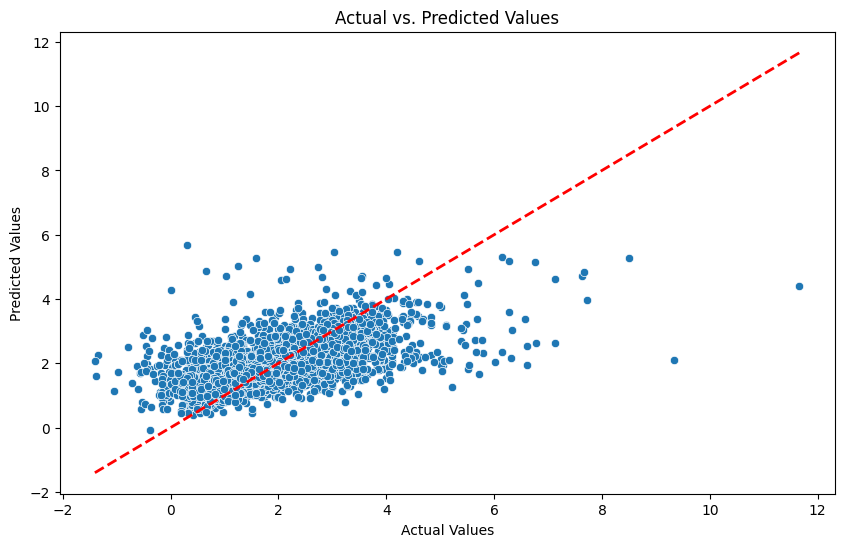

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are defined from your Random Forest regression
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_la_ymax, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Plot the perfect prediction line
min_val = min(y_test_la_ymax.min(), y_pred.min())
max_val = max(y_test_la_ymax.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, ls='--')

plt.show()


In [21]:
rf_pc = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pc.fit(X_train_pc_ymax, y_train_pc_ymax)

result = permutation_importance(rf_pc, X_test_pc_ymax, y_test_pc_ymax, n_repeats=100, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = X_test_pc_ymax.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

,Importance,Std
annual_temp_value,0.045161,0.002975
summer_temp_value,0.056827,0.006256
RAD_value,0.075450,0.006584
TWI_value,0.101954,0.007125
annual_precp_value,0.143462,0.005673
slope_value,0.151505,0.008322
summer_precp_value,0.166954,0.008269
SWI_value,0.549477,0.018177
snow_value,0.704287,0.018945


In [22]:
# Make predictions on the testing set
y_pred_pc = rf.predict(X_test_pc_ymax)

# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test_pc_ymax, y_pred_pc)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0005275701378224369


In [23]:
# Assuming y_test are your actual values and y_pred are the predictions
r2 = r2_score(y_test_pc_ymax, y_pred_pc)
print("R^2 score:", r2)

R^2 score: 0.3519204976219735


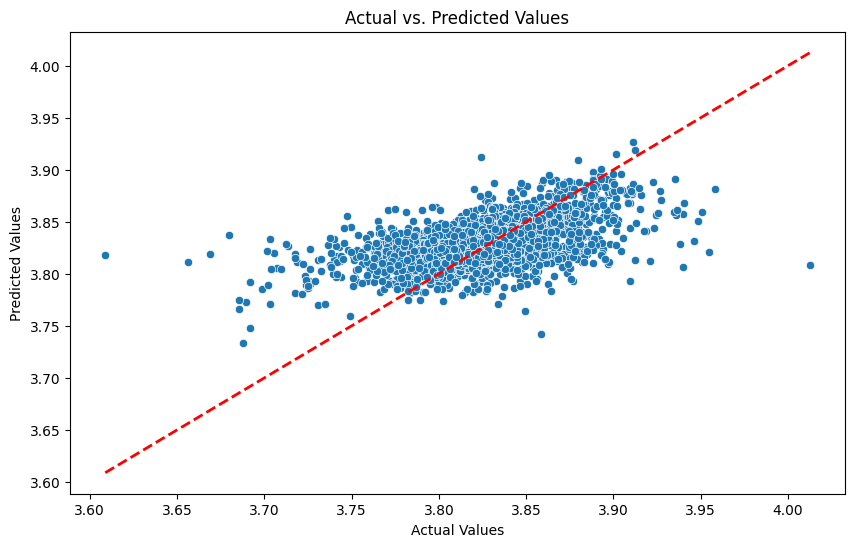

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are defined from your Random Forest regression
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pc_ymax, y=y_pred_pc)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Plot the perfect prediction line
min_val = min(y_test_pc_ymax.min(), y_pred_pc.min())
max_val = max(y_test_pc_ymax.max(), y_pred_pc.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, ls='--')

plt.show()

In [26]:
rf_ldmc = RandomForestRegressor(n_estimators=100, random_state=42)
rf_ldmc.fit(X_train_ldmc_ymax, y_train_ldmc_ymax)

result = permutation_importance(rf_ldmc, X_test_ldmc_ymax, y_test_ldmc_ymax, n_repeats=100, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = X_train_ldmc_ymax.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

,Importance,Std
summer_temp_value,0.055970,0.002088
snow_value,0.107410,0.005154
RAD_value,0.158079,0.005586
SWI_value,0.177884,0.007645
summer_precp_value,0.180848,0.006600
TWI_value,0.246985,0.008915
annual_precp_value,0.282297,0.008025
annual_temp_value,0.363388,0.008659
slope_value,0.422037,0.010496


In [27]:
# Make predictions on the testing set
y_pred_ldmc = rf_ldmc.predict(X_test_ldmc_ymax)

# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test_ldmc_ymax, y_pred_ldmc)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1841546840744454


In [28]:
# Assuming y_test are your actual values and y_pred are the predictions
r2 = r2_score(y_test_ldmc_ymax, y_pred_ldmc)
print("R^2 score:", r2)

R^2 score: 0.6365296580094311


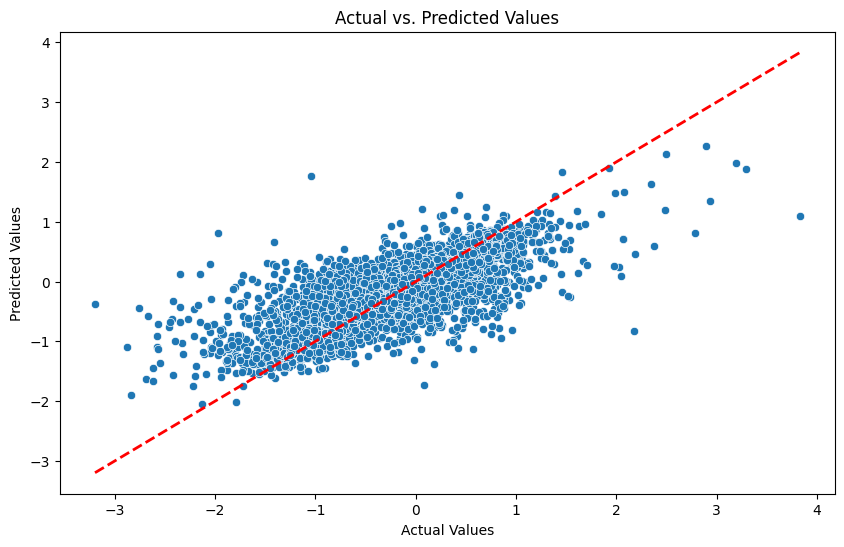

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are defined from your Random Forest regression
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_ldmc_ymax, y=y_pred_ldmc)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Plot the perfect prediction line
min_val = min(y_test_ldmc_ymax.min(), y_pred_ldmc.min())
max_val = max(y_test_ldmc_ymax.max(), y_pred_ldmc.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, ls='--')

plt.show()

In [30]:
rf_sla = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sla.fit(X_train_sla_ymax, y_train_sla_ymax)

result = permutation_importance(rf_sla, X_test_sla_ymax, y_test_sla_ymax, n_repeats=100, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = X_test_sla_ymax.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

,Importance,Std
slope_value,0.074413,0.003838
TWI_value,0.079746,0.004757
snow_value,0.100667,0.006302
SWI_value,0.114217,0.005536
summer_precp_value,0.121060,0.006054
annual_temp_value,0.207084,0.008556
annual_precp_value,0.220448,0.007261
RAD_value,0.299582,0.009446
summer_temp_value,0.558025,0.011661


In [31]:
# Make predictions on the testing set
y_pred_sla = rf_sla.predict(X_test_sla_ymax)

# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test_sla_ymax, y_pred_sla)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0039771128836596685


In [32]:
# Assuming y_test are your actual values and y_pred are the predictions
r2 = r2_score(y_test_sla_ymax, y_pred_sla)
print("R^2 score:", r2)

R^2 score: 0.4983443548454968


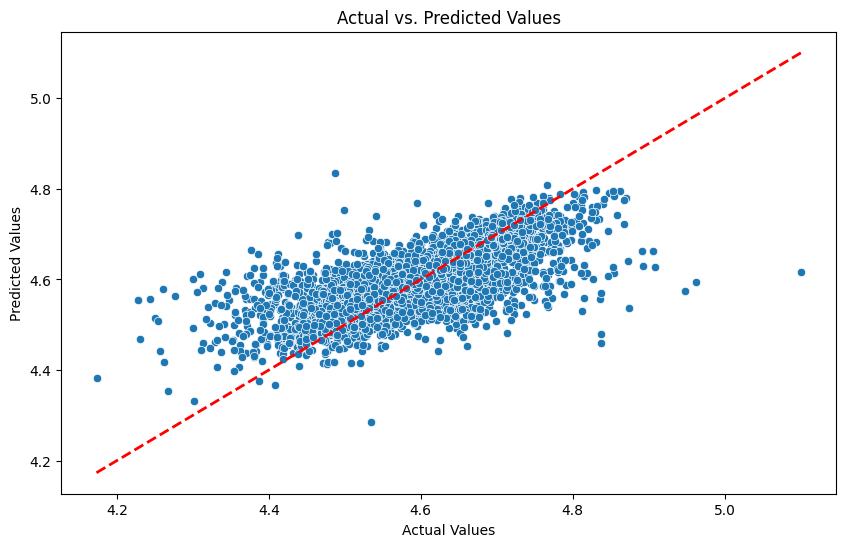

In [33]:
# Assuming y_test and y_pred are defined from your Random Forest regression
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_sla_ymax, y=y_pred_sla)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Plot the perfect prediction line
min_val = min(y_test_sla_ymax.min(), y_pred_sla.min())
max_val = max(y_test_sla_ymax.max(), y_pred_sla.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, ls='--')

plt.show()

In [34]:
rf_d15n = RandomForestRegressor(n_estimators=100, random_state=42)
rf_d15n.fit(X_train_d15n_ymax, y_train_d15n_ymax)

result = permutation_importance(rf_d15n, X_test_d15n_ymax, y_test_d15n_ymax, n_repeats=100, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = X_test_d15n_ymax.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

,Importance,Std
slope_value,0.049737,0.002537
RAD_value,0.108075,0.006018
snow_value,0.119505,0.005073
summer_precp_value,0.157997,0.006677
SWI_value,0.200359,0.009067
annual_precp_value,0.250803,0.007725
summer_temp_value,0.255020,0.006456
TWI_value,0.302582,0.011213
annual_temp_value,0.315023,0.010076


In [37]:
# Make predictions on the testing set
y_pred_d15n = rf_d15n.predict(X_test_d15n_ymax)

# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test_d15n_ymax, y_pred_d15n)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.006136905347443


In [38]:
# Assuming y_test are your actual values and y_pred are the predictions
r2 = r2_score(y_test_d15n_ymax, y_pred_d15n)
print("R^2 score:", r2)

R^2 score: 0.5449239005106081


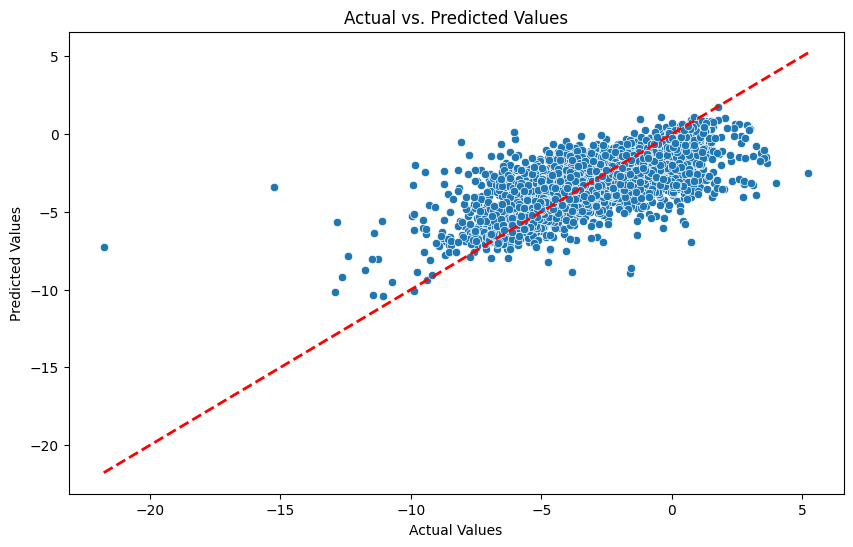

In [39]:
# Assuming y_test and y_pred are defined from your Random Forest regression
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_d15n_ymax, y=y_pred_d15n)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Plot the perfect prediction line
min_val = min(y_test_d15n_ymax.min(), y_pred_d15n.min())
max_val = max(y_test_d15n_ymax.max(), y_pred_d15n.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, ls='--')

plt.show()

In [40]:


rf_d13c = RandomForestRegressor(n_estimators=100, random_state=42)
rf_d13c.fit(X_train_d13c_ymax, y_train_d13c_ymax)

result = permutation_importance(rf_d13c, X_test_d13c_ymax, y_test_d13c_ymax, n_repeats=100, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = X_test_d13c_ymax.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

,Importance,Std
slope_value,0.034325,0.001798
summer_precp_value,0.118735,0.004802
annual_precp_value,0.122312,0.006851
TWI_value,0.124592,0.006925
SWI_value,0.144225,0.005751
annual_temp_value,0.156285,0.005364
RAD_value,0.290717,0.010019
snow_value,0.340009,0.009903
summer_temp_value,0.576727,0.011911


In [41]:
# Make predictions on the testing set
y_pred_d13c = rf_d13c.predict(X_test_d13c_ymax)

# Calculate the Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test_d13c_ymax, y_pred_d13c)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.17281089542410055


In [42]:
# Assuming y_test are your actual values and y_pred are the predictions
r2 = r2_score(y_test_d13c_ymax, y_pred_d13c)
print("R^2 score:", r2)

R^2 score: 0.48098771033053356


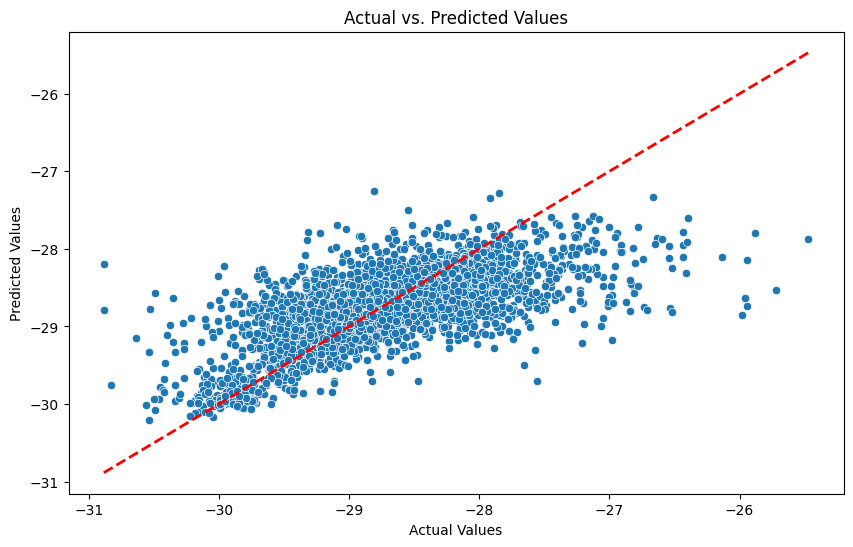

In [43]:
# Assuming y_test and y_pred are defined from your Random Forest regression
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_d13c_ymax, y=y_pred_d13c)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Plot the perfect prediction line
min_val = min(y_test_d13c_ymax.min(), y_pred_d13c.min())
max_val = max(y_test_d13c_ymax.max(), y_pred_d13c.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', lw=2, ls='--')

plt.show()